In [48]:
# Importing Packages
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() # By default seaborn theme, scaling, and color palette

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\abc\\Desktop\\Board Infinity\\ML\\ML_Assign\\1'

In [2]:
for dirname, _, filenames in os.walk('C:\\Users\\abc\\Desktop\\Board Infinity\\ML\\ML_Assign\\1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\abc\Desktop\Board Infinity\ML\ML_Assign\1\Bank marketing prediction.pdf
C:\Users\abc\Desktop\Board Infinity\ML\ML_Assign\1\bank-marketing.csv
C:\Users\abc\Desktop\Board Infinity\ML\ML_Assign\1\Data dictionary.txt
C:\Users\abc\Desktop\Board Infinity\ML\ML_Assign\1\ML_Project.ipynb


In [4]:
# Import dataset
a = pd.read_csv('bank-marketing.csv')
df = pd.DataFrame(a)

# Understanding the data
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Checking data_types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
# Checking shape : Total number of rows and columns
df.shape

(45211, 19)

In [7]:
# Checking Unique values 
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [8]:
# Checking duplicates
df[df.duplicated()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [9]:
# Checking missing values
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [10]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
print('Mean is',df['pdays'].mean())
print('Median is',df['pdays'].median())
print('Mode is',df['pdays'].mode()[0])

Mean is 40.19782796222158
Median is -1.0
Mode is -1


#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [12]:
# Since for relevant pdays, need to drop -1
df1 = df[df['pdays'] != -1]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8257 non-null   int64 
 1   job        8257 non-null   object
 2   salary     8257 non-null   int64 
 3   marital    8257 non-null   object
 4   education  8257 non-null   object
 5   targeted   8257 non-null   object
 6   default    8257 non-null   object
 7   balance    8257 non-null   int64 
 8   housing    8257 non-null   object
 9   loan       8257 non-null   object
 10  contact    8257 non-null   object
 11  day        8257 non-null   int64 
 12  month      8257 non-null   object
 13  duration   8257 non-null   int64 
 14  campaign   8257 non-null   int64 
 15  pdays      8257 non-null   int64 
 16  previous   8257 non-null   int64 
 17  poutcome   8257 non-null   object
 18  response   8257 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


In [13]:
print('Mean is',df1['pdays'].mean())
print('Median is',df1['pdays'].median())
print('Mode is',df1['pdays'].mode()[0])

Mean is 224.57769165556496
Median is 194.0
Mode is 182


#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?¶

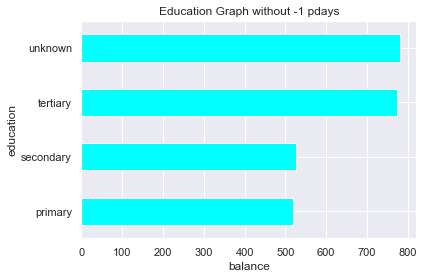

Unknown has highest median 782.0


In [14]:
plt.title('Education Graph without -1 pdays')
plt.xlabel('balance')
df2 = df1.groupby(['education']).median()['balance']
df2.plot(kind='barh',color='cyan')
plt.show()

print('Unknown has highest median',df2.max())

#### Make a box plot for pdays. Do you see any outliers?

Boxplot without -1 pdays


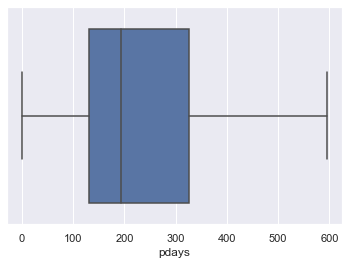

In [49]:
print('Boxplot without -1 pdays')
sns.boxplot(df1['pdays'])
plt.show()

Boxplot with no Outliers


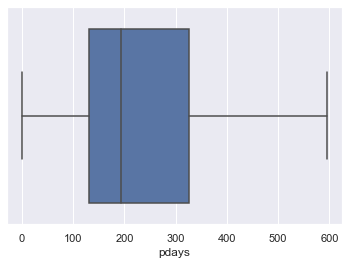

In [50]:
# Handling the Outliers
df2 = df1[df1['pdays'] >= 600]
df1 = df1.drop(df2.index,axis=0)

print('Boxplot with no Outliers')
sns.boxplot(df1['pdays'])
plt.show()

In [51]:
# Resultant New Data after filtering out ouliers & -1 pdays
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       8205 non-null   int64
 1   salary    8205 non-null   int64
 2   balance   8205 non-null   int64
 3   day       8205 non-null   int64
 4   duration  8205 non-null   int64
 5   campaign  8205 non-null   int64
 6   pdays     8205 non-null   int64
 7   previous  8205 non-null   int64
 8   response  8205 non-null   int32
dtypes: int32(1), int64(8)
memory usage: 545.0 KB


#### Bi-Variate Analysis | EDA

#### Convert the response variable to a convenient form

In [18]:
df1['response'] = np.where(df1['response']=='no',0,1)

In [19]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


#### Make suitable plots for associations with numerical features and categorical features

#### Identifying categorical and numerical columns

In [20]:
cols = df1.columns.to_list()
num_cols= df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['targeted', 'month', 'contact', 'job', 'loan', 'education', 'marital', 'default', 'housing', 'poutcome']


#### Visualizing Numerical Features with Response

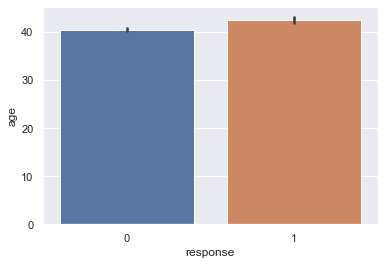

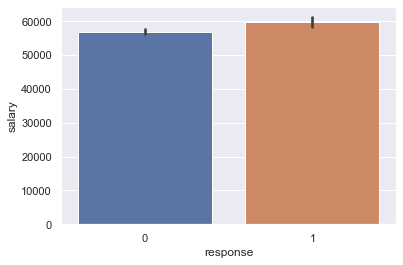

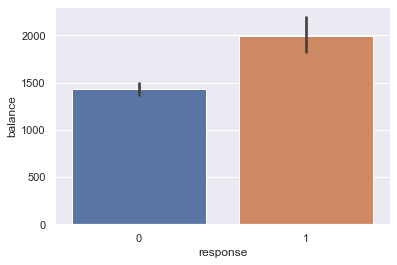

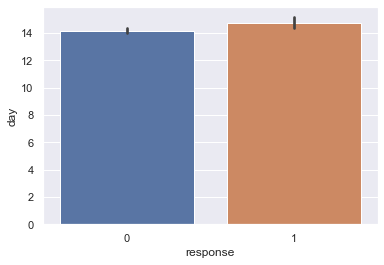

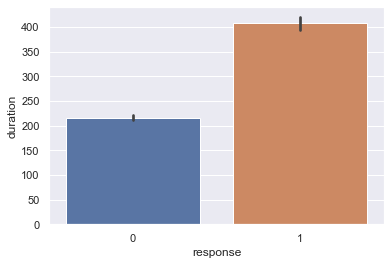

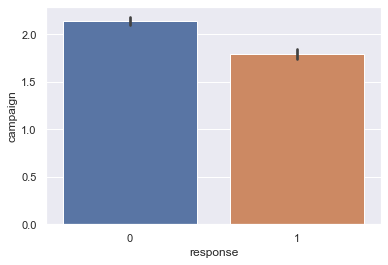

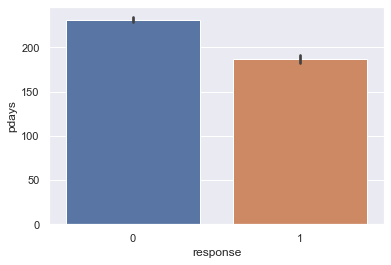

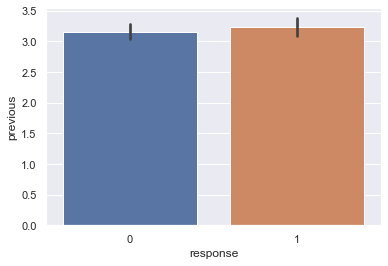

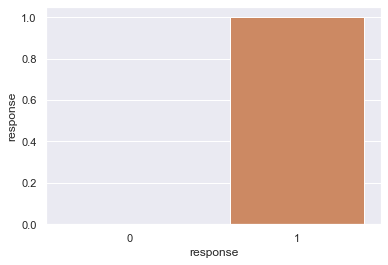

In [53]:
for i in df1[num_cols]:
    sns.barplot(df1['response'],df1[i])
    plt.show()

#### Visualizing Categorical Features with Response

In [ ]:
# Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'


In [ ]:
# The -1 pdays or missing values or outliers are filtered out as we would not be using that in Modelling.

The necessary transformations for the categorical variables and the numeric variables

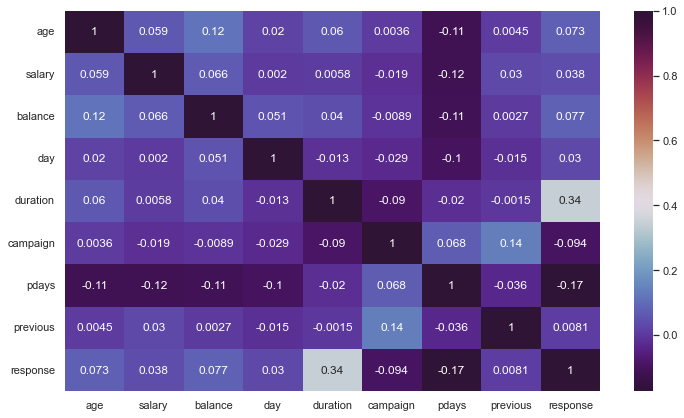

In [54]:
# Correlation Matrix on Resultant Data
plt.figure(figsize=(12,7))
corr = df1.corr()
sns.heatmap(corr,annot=True,cmap= 'twilight_shifted')
plt.show()

##### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score

In [27]:
# Describing the resultant data 
df1.reset_index(inplace = True)
df1.drop(['index'],axis=1,inplace=True)
df1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,response
count,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000
mean,40.955759,57552.833638,1560.162949,14.284217,260.359902,2.060695,221.312736,3.167093,0.229860
std,11.436643,31769.246532,3068.366410,7.918706,235.389504,1.564156,107.994505,4.515102,0.420768
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,167.000000,7.000000,113.000000,1.000000,131.000000,1.000000,0.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,193.000000,2.000000,0.000000
75%,48.000000,70000.000000,1752.000000,20.000000,324.000000,2.000000,326.000000,4.000000,0.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,595.000000,275.000000,1.000000


In [28]:
# Understanding the resultant data 
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
1,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
2,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
3,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
4,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [29]:
# Since contact,marital,education,month,poutcome,loan,job,default,housing,targeted column is categorical so firstly need to handle it
df1[['education', 'contact', 'default', 'loan', 'housing', 'targeted', 'month', 'poutcome', 'job', 'marital']].nunique()

education     4
contact       3
default       2
loan          2
housing       2
targeted      2
month        12
poutcome      4
job          12
marital       3
dtype: int64

In [69]:
## Generally X - Independent variable, y - Dependent variable

X = df_dummy.drop(['response'],axis=1)
y = df_dummy['response']

print(X.head())
print(y.head())

   age  salary  balance  day  duration  campaign  pdays  previous  \
0   33   50000      882   21        39         1    151         3   
1   42   50000     -247   21       519         1    166         1   
2   33   70000     3444   21       144         1     91         4   
3   36  100000     2415   22        73         1     86         4   
4   36  100000        0   23       140         1    143         3   

   education_secondary  education_tertiary  ...  month_jul  month_jun  \
0                    0                   1  ...          0          0   
1                    1                   0  ...          0          0   
2                    1                   0  ...          0          0   
3                    0                   1  ...          0          0   
4                    0                   1  ...          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0          0          0          1          0              

In [70]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=11)

In [71]:
# Checking data split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5743, 31)
(5743,)
(2462, 31)
(2462,)


In [72]:
# Scaling

# Applying Standard Scaling to make both of them comparable
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [73]:
# Logistic Regression code
lg = LogisticRegression()
lg.fit(X_train,y_train)

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)


print(y_train_pred)
print(y_test_pred)

[0 0 1 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [74]:
# Validating on Training
print(recall_score(y_train,y_train_pred))
print(precision_score(y_train,y_train_pred))
print(f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print('\n')

# Validating on Testing
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))
print(f1_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

0.5460725075528701
0.6999031945788964
0.6134917267713194
0.8413721051715132


0.5284697508896797
0.6971830985915493
0.6012145748987854
0.8399675060926076


In [75]:
# Confusion Matrix is used to define performance of a classification algorithm
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix for training data is:
[[4109  310]
 [ 601  723]]


Confusion Matrix for testing data is:
[[1771  129]
 [ 265  297]]


In [64]:
# Recursive feature Elimination

In [40]:
# P Values & Vif

In [41]:
# K fold Cross Validation

In [42]:
# Feature Selection

#### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=14,min_samples_split=7)
rf_model.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(y_train_pred)
print(y_test_pred)

[0 0 1 ... 0 1 0]
[0 0 0 ... 0 0 0]


In [66]:
# Validating on Training
print(recall_score(y_train,y_train_pred))
print(precision_score(y_train,y_train_pred))
print(f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print('\n')

# Validating on Testing
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))
print(f1_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

0.8126888217522659
0.9496910856134158
0.8758648758648759
0.9468918683614835


0.5373665480427047
0.7512437810945274
0.6265560165975105
0.8537774167343624


In [67]:
# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix for training data is:
[[4362   57]
 [ 248 1076]]


Confusion Matrix for testing data is:
[[1800  100]
 [ 260  302]]


In [68]:
# K fold Cross Validation

In [47]:
# Feature Selection